## Machine Learning: Regressão

Predição de valor de imóvel para a cidade de Boston

### 1º Importação dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
from sklearn.datasets import load_diabetes

diabets_dataset = load_diabetes()

#### Descrição dos objetos

In [4]:
print('Nomes das variáveis quantitativas (atributos)', diabets_dataset.feature_names)
print()
print('Descrição', diabets_dataset.DESCR)
print()
print('Variáveis quantitativas', diabets_dataset.data)
print()
print('Variáveis qualitativas', diabets_dataset.target)

Nomes das variáveis quantitativas (atributos) ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Descrição .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimu

In [5]:
# Transformação do dataset em dataframe do Pandas, procedimento necessário por se tratar de um método de regressão
dataset = pd.DataFrame(diabets_dataset.data, columns = diabets_dataset.feature_names)
dataset.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504


In [6]:
# Adição do target nesse dataframe
dataset['MEDV'] = diabets_dataset.target

dataset.head(5)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,MEDV
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### 2º Visualização e divisão dos dados

#### Organizando dataset

In [7]:
# Divisão habitual dos conjuntos entre 'features/atributos' e 'targets/saidas'
array = dataset.values
print(type(array))
x = array[:,0:10]
y = array[:,10]

<class 'numpy.ndarray'>


In [8]:
# divisão automatica dos dados
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [9]:
print("Formato de X_train: ", X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de Y_train: ", Y_train.shape)
print("Formato de Y_test: ", Y_test.shape)

Formato de X_train:  (309, 10)
Formato de X_test:  (133, 10)
Formato de Y_train:  (309,)
Formato de Y_test:  (133,)


#### Visualizando dados

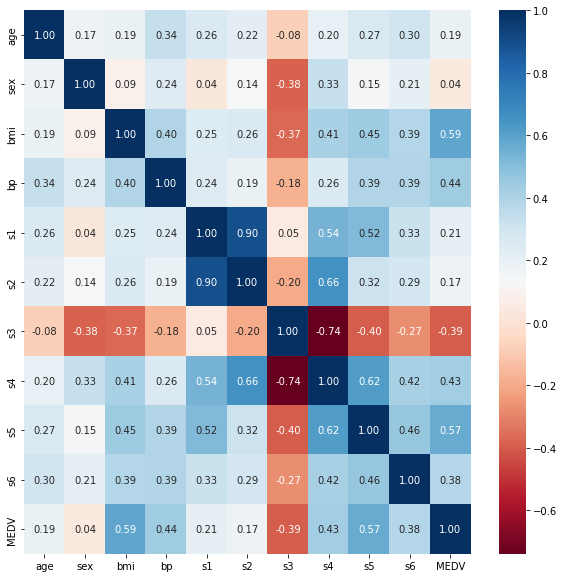

In [10]:
# Obtendo estatística de correlação
corr = dataset.corr()

# Gerando gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# Definindo labels do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va="center")

#show plt
plt.show()

### Mapa de correlações:

<p>Correlação variando sempre de -1 a 1.</p> 
<p>Correlações em maior intensidade de azul significam forte correlação entre atributos. </p>
<p>Correlações em maior intensidade de vermelho significam forte correlação inversa entre atributos.</p>

### 3º Aprendizado e Avaliação do modelo

In [11]:
# Importação de bibliotecas de funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#### Modelo Linear Regression

In [12]:
# Loading do modelo
from sklearn.linear_model import LinearRegression

In [13]:
model_1 = LinearRegression()
model_1.fit(X_train, Y_train)

LinearRegression()

In [14]:
# Avaliação de desempenho de acurácia a partir do cross-validation
cv_1 = cross_val_score(estimator=model_1, X=X_train, y=Y_train, cv=10)

In [15]:
# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_1 = model_1.predict(X_train)
r2_train_1 = r2_score(Y_train, y_pred_train_1)

y_pred_test_1 = model_1.predict(X_test)
r2_test_1 = r2_score(Y_test, y_pred_test_1)

In [16]:
# Calculo de desempenho utilizando RMSE
rmse_1 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_1)))

In [17]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_1.mean())
print("R2 train: ", r2_train_1)
print("R2 test: ", r2_test_1)
print("RMSE: ", rmse_1)

Modelo Linear Regression
CV:  0.458294650369815
R2 train:  0.5202079481315738
R2 test:  0.4742109267226453
RMSE:  55.769027423524484


#### Modelo Decision Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, Y_train)

DecisionTreeRegressor()

In [20]:
# Avaliação do desempenho de acurácia utilizado cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=Y_train, cv=10)

In [21]:
# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(Y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(Y_test, y_pred_test_2)

In [22]:
# Calculo de desempenho utilizando RMSE

rmse_2 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_2)))

In [23]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_2.mean())
print("R2 train: ", r2_train_2)
print("R2 test: ", r2_test_2)
print("RMSE: ", rmse_2)

Modelo Linear Regression
CV:  -0.18383321622021395
R2 train:  1.0
R2 test:  -0.27023987354773293
RMSE:  86.68224749090894


#### Modelo Polinomial Regressional de 2ª ordem

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(x_poly, Y_train)

model_3 = LinearRegression()
model_3.fit(x_poly, Y_train)

LinearRegression()

In [26]:
print(X_train.shape)

(309, 10)


In [27]:
print(x_poly.shape)

(309, 286)


In [28]:
# Avaliação de desempenho de acurácia a partir do cross-validation
cv_3 = cross_val_score(estimator=model_3, X=x_poly, y=Y_train, cv=10)

# Calculo de desempenho utilizando métrica r2 (distancia quadratica de um valor até o valor real)
y_pred_train_3 = model_3.predict(x_poly)
r2_train_3 = r2_score(Y_train, y_pred_train_3)

y_pred_test_3 = model_3.predict(poly_reg.fit_transform(X_test))
r2_test_3 = r2_score(Y_test, y_pred_test_3)

# Calculo de desempenho utilizando RMSE
rmse_3 = (np.sqrt(mean_squared_error(Y_test, y_pred_test_3)))

In [29]:
# Exibição dos resultados
print("Modelo Linear Regression")
print("CV: ", cv_3.mean())
print("R2 train: ", r2_train_3)
print("R2 test: ", r2_test_3)
print("RMSE: ", rmse_3)

Modelo Linear Regression
CV:  -8779.034463810312
R2 train:  -0.6708029056495415
R2 test:  -951.5827906368116
RMSE:  2373.7701160621627


###  4º Comparação de desempenho

In [30]:
# Medição de erro

models = [('Linear Regression', rmse_1, r2_train_1, r2_test_1, cv_1.mean()),
         ('Decision Tree Regression', rmse_2, r2_train_2, r2_test_2, cv_2.mean()),
         ('Polynomial Regression (2nd)', rmse_3, r2_train_3, r2_test_3, cv_3.mean())]

In [31]:
predict = pd.DataFrame(data=models, columns=['Model', 'RMSE', 'R2_score(train)', 'R2_score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_score(train),R2_score(test),Cross-Validation
0,Linear Regression,55.769027,0.520208,0.474211,0.458295
1,Decision Tree Regression,86.682247,1.000000,-0.270240,-0.183833
2,Polynomial Regression (2nd),2373.770116,-0.670803,-951.582791,-8779.034464
